### Import data

In [8]:
include("importData.jl")
include("Hill.jl")
include("plot.jl")

# import G1, G2, and population data
conc, popl, g2l, g1l, g2_0l, g1_0l = setup_data("paclitaxel");
conc_l = append!([0.00000000001], conc[2:end])

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/importData.jl:37


8-element Array{Float64,1}:
  1.0e-11
  0.1    
  1.0    
  2.0    
  3.0    
  5.0    
  7.5    
 15.0    

### Hill model, residual functions and optimization

In [9]:
#  [EC50, b_steepness, alpha_min, alpha_max, beta_min, beta_max, tau1_mean, tau1_max, tau2_min, tau2_max, gamma1_max, gamma2_max]
# guess
guess = [15.0, 1.0, 0.00682578, 0.00958013, 0.00503788, 0.0933964, 38.941, 9.94827, 0.00294624, 0.0422821, 0.02, 0.008]
# max num of steps
num_steps=7000

best_fit, params = optimize_hill(guess, conc_l, g1l, g2l, g1_0l, g2_0l, num_steps)

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
100.03 secs, 714 evals, 617 steps, improv/step: 0.381 (last = 0.3809), fitness=31597.095330220
200.15 secs, 1433 evals, 1336 steps, improv/step: 0.331 (last = 0.2879), fitness=23262.950615479
300.28 secs, 2161 evals, 2064 steps, improv/step: 0.288 (last = 0.2102), fitness=20891.305914576
400.33 secs, 2879 evals, 2782 steps, improv/step: 0.267 (last = 0.2047), fitness=17399.206677479
500.41 secs, 3595 evals, 3498 steps, improv/step: 0.248 (last = 0.1746), fitness=16807.863041098
600.43 secs, 4307 evals, 4210 steps, improv/step: 0.242 (last = 0.2107), fitness=15937.024166087


┌ Warning: Optimization interrupted, recovering intermediate results...
└ @ BlackBoxOptim /home/farnazm/.julia/packages/BlackBoxOptim/ZdVko/src/opt_controller.jl:458


(15579.93048291245, [3.1194503586499454, 2.25754938707591, 0.007951491193397492, 0.05391845558342688, 0.0557680284031682, 0.029899164823405853, 13.367442614266002, 11.446253795763933, 6.198575482721649, 5.4191329736743095, 0.04663590841244097, 0.001709750132900305])

In [10]:
pars=getDDEparams(params, conc_l)

6×8 Array{Float64,2}:
  0.0539185     0.053899     0.0506454    …   0.0135261   0.00924096
  0.0298992     0.0299101    0.0317412        0.0526308   0.0550424 
 11.4463       11.4471      11.5831          13.1345     13.3135    
  5.41913       5.41946      5.47463          6.10405     6.17671   
  5.25136e-28   1.97507e-5   0.00332074       0.0409802   0.0453277 
  1.92523e-29   7.24092e-7   0.000121744  …   0.0015024   0.00166179

### Plot the data with the new set of parameters for DDE

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Bool, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/plot.jl:29
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Symbol, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/plot.jl:29


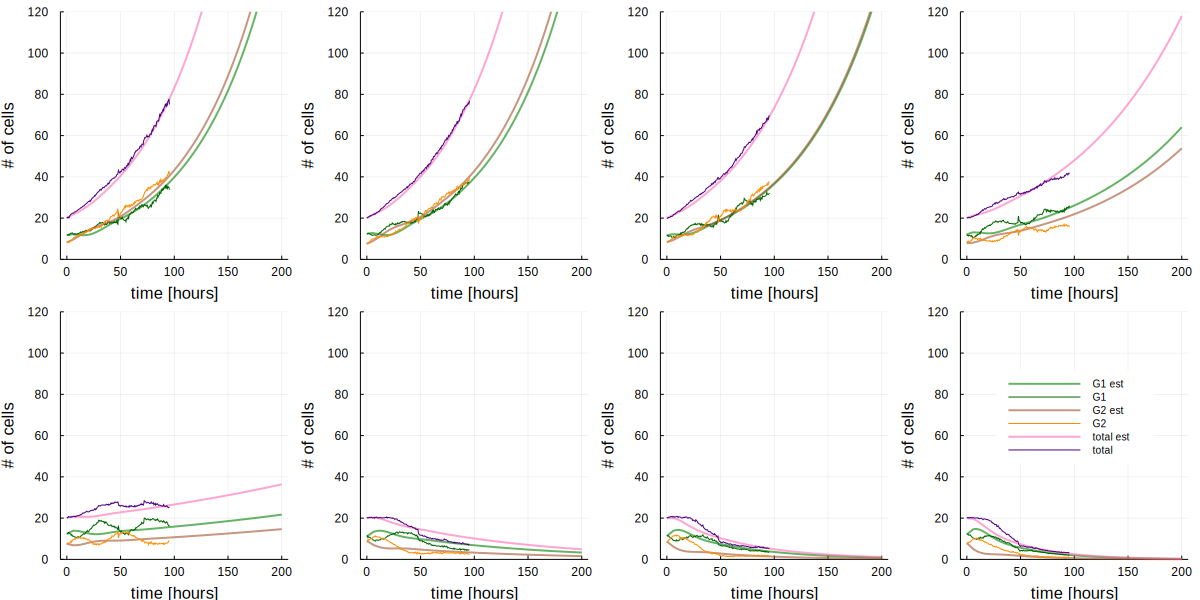

In [11]:
plot_all(pars, popl, g2l, g1l, g2_0l, g1_0l)

### Plot Hill curve for all of the DDE model parameters

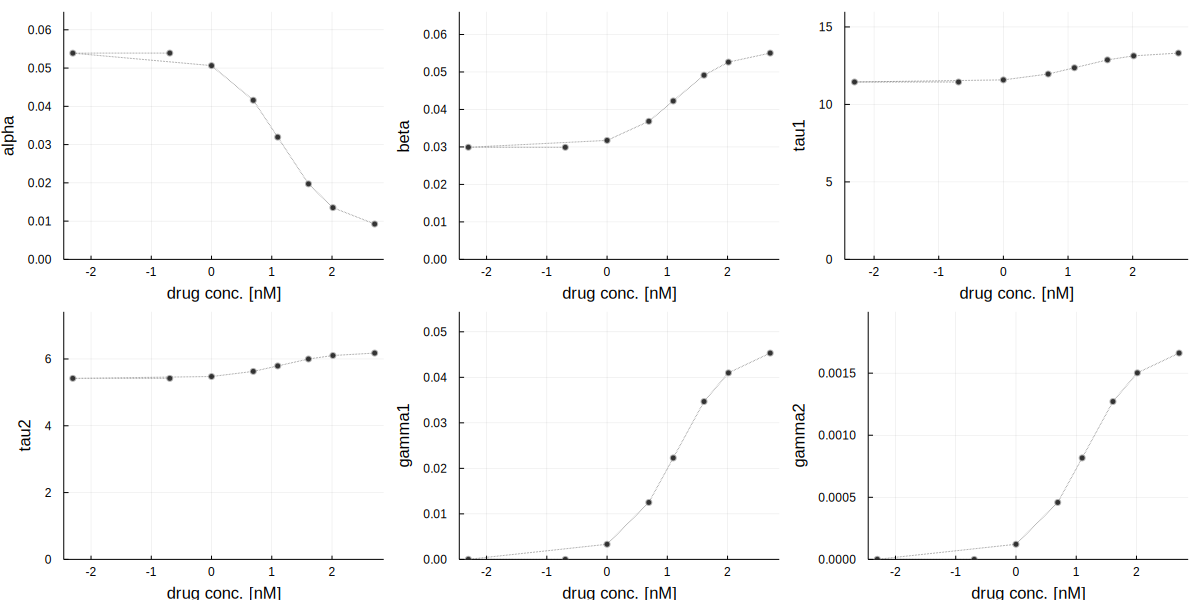

In [12]:
plot_parameters(conc_l, pars)